In [99]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [104]:
import pandas_datareader as pdr
df = web.DataReader('AAPL', data_source='yahoo', start='2018-01-1')
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,172.300003,169.259995,170.160004,172.259995,25555900.0,166.353714
2018-01-03,174.550003,171.960007,172.529999,172.229996,29517900.0,166.324722
2018-01-04,173.470001,172.080002,172.539993,173.029999,22434600.0,167.097290
2018-01-05,175.369995,173.050003,173.440002,175.000000,23660000.0,168.999741
2018-01-08,175.610001,173.929993,174.350006,174.350006,20567800.0,168.372040
...,...,...,...,...,...,...
2020-06-18,353.450012,349.220001,351.410004,351.730011,24205100.0,351.730011
2020-06-19,356.559998,345.149994,354.640015,349.720001,66119000.0,349.720001
2020-06-22,359.459991,351.149994,351.339996,358.869995,33861300.0,358.869995


In [105]:
# MACD & Signal Line indicators
ShortEMA = df['Close'].ewm(span=12, adjust=False).mean()
LongEMA = df['Close'].ewm(span=26, adjust=False).mean()
MACD = ShortEMA - LongEMA
Signal = MACD.ewm(span=9, adjust=False).mean()


In [106]:
df['MACD'] = MACD
df['Signal'] = Signal

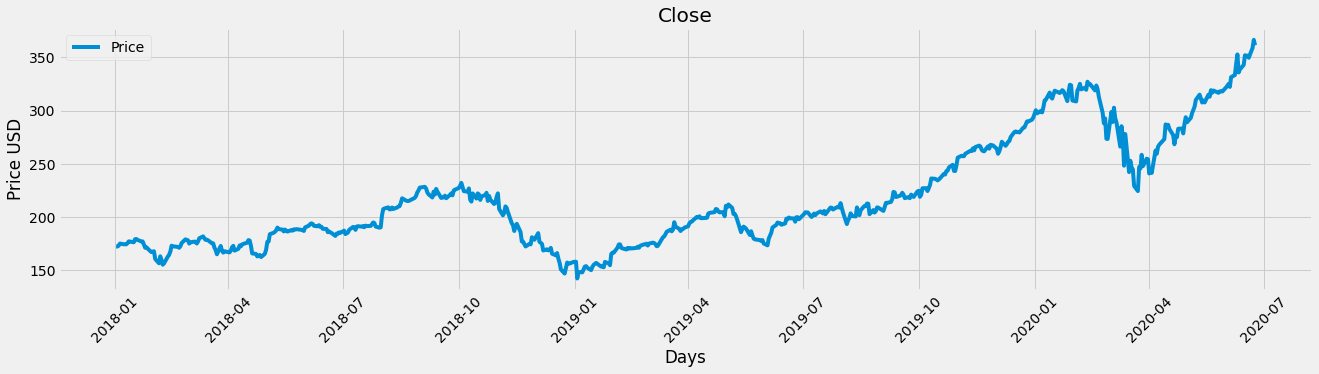

In [109]:
plt.figure(figsize=(20, 4.5))
plt.plot(df['Close'], label='Price')
plt.xticks(rotation=45)
plt.title('Close')
plt.xlabel('Days')
plt.ylabel('Price USD')
plt.legend(loc="upper left")

In [112]:
def buy_sel(signal):
  Buy = []
  Sell = []
  flag = -1
  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Close'][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
      Sell.append(np.nan)
      Buy.append(np.nan)

  return (Buy, Sell)

In [113]:
a = buy_sel(df)
df['BuySignal'] = a[0]
df['SellSignal'] = a[1]

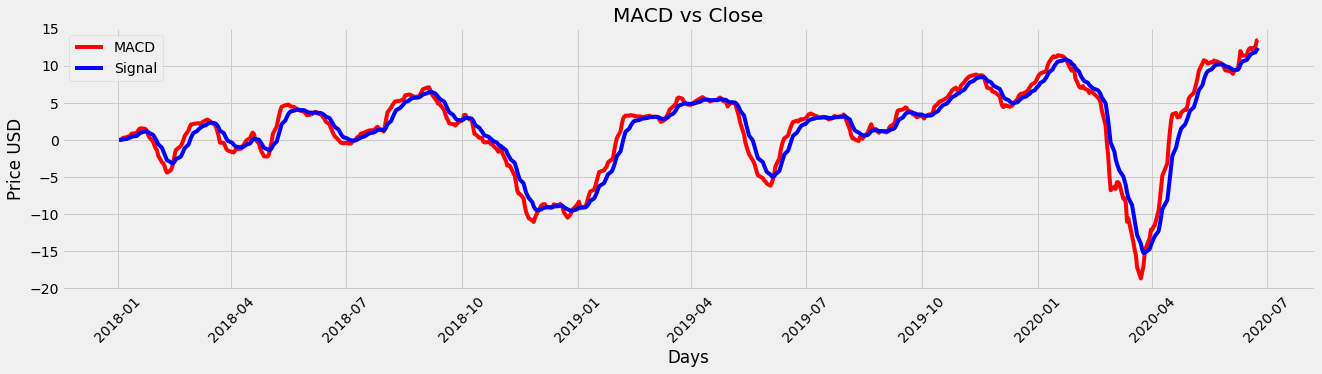

In [114]:
plt.figure(figsize=(20, 4.5))
plt.plot(df.index, MACD, label='MACD', color='red')
plt.plot(df.index, Signal, label='Signal', color='blue')
plt.xticks(rotation=45)
plt.title('MACD vs Close')
plt.xlabel('Days')
plt.ylabel('Price USD')
plt.legend(loc="upper left")
plt.show()

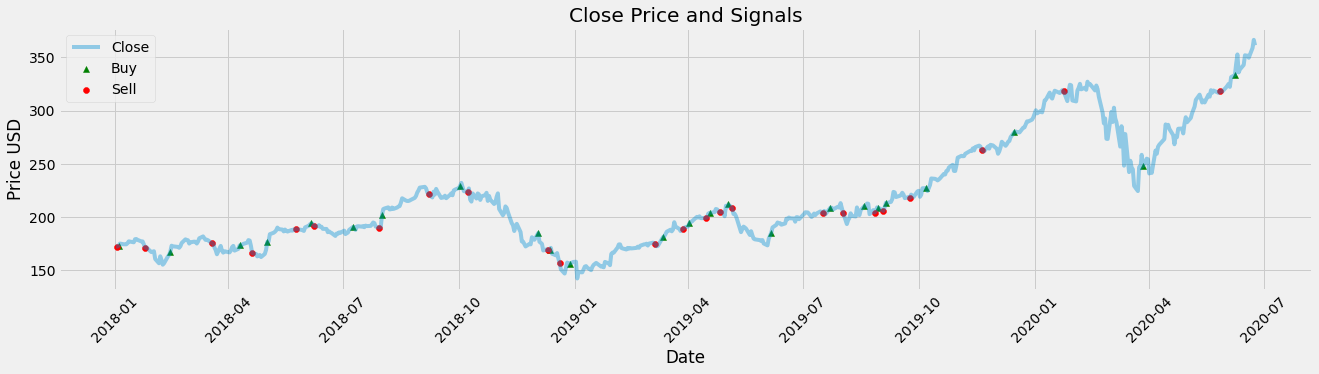

In [116]:
plt.figure(figsize=(20, 4.5))
plt.scatter(df.index, df['BuySignal'], label='Buy', color='green', marker='^')
plt.scatter(df.index, df['SellSignal'], label='Sell', color='red', marker='o')
plt.plot(df.index, df['Close'], label='Close', alpha=0.4)
plt.xticks(rotation=45)
plt.title('Close Price and Signals')
plt.xlabel('Date')
plt.ylabel('Price USD')
plt.legend(loc="upper left")
plt.show()